Let's start by importing some libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import sys
sys.path.append("..")

# Genetic Programming

Now we'll use the Genetic Programming. Importing it:

In [2]:
from evolpy import GP

## Periodic Function

Now we'll use a different function, the Periodic Function [2].

$$
f(x_1, x_2, ..., x_n) = 1 + \sum_{i=1}^{n} \sin^2(x_i) - 0.1e^{(\sum_{i=1}^{n} x_i^2)},
$$
subject to $-10 \leq x_i \leq 10$.

Plot:

![Source: BenchmarkFcns](http://benchmarkfcns.xyz/benchmarkfcns/plots/periodicfcn.png "Source: BenchmarkFcns")

The global minima is located at $x^* = (0, 0, ..., 0), f(x^*) = 0.9$.

[2] M. M. Ali, C. Khompatraporn, Z. B. Zabinsky, “A Numerical Evaluation of Several
Stochastic Algorithms on Selected Continuous Global Optimization Test Problems,”
Journal of Global Optimization, vol. 31, pp. 635-672, 2005.

Converting to Python:

In [3]:
def periodic(individual):
    sum_squared_sin = np.square(np.sin(individual)).sum()
    sum_squared = np.square(individual).sum()
    return 1 + sum_squared_sin -.1*np.exp(-sum_squared)

The parameters will be represented again using an OrderedDict. We'll create a dictionary where each key is a $x_i$ and the value is a tuple of the bounds (-10, 10).

In [4]:
parameters = OrderedDict([(f'x{i}', (-10,10)) for i in range(5)])

Instantiating and running the evolver:

In [5]:
evolver = GP(fitness=periodic, 
             parameters=parameters, 
             populationSize=10, 
             maxGen=100)

best_individual, fitness_history = evolver.run()

Best individual information:

In [6]:
print(*best_individual['gene'].items(), sep='\n')

print('\nFitness: {}'.format(best_individual['fitness']))

('x0', 3.9076640908574863e-32)
('x1', 3.564544428926355e-49)
('x2', 2.8798545429632042e-36)
('x3', 1.1066854747258031e-45)
('x4', 1.610777921754867e-41)

Fitness: 0.9


Fitness history plot:

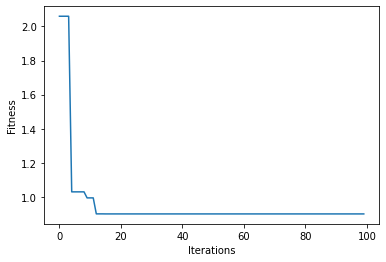

In [7]:
plt.plot(fitness_history)
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.show()